# Partiel Data Science 
## Charles PAULAS VICTOR - MD4 P2020

Vous êtes datascientist chez [**Kickstarter**](https://www.kickstarter.com/), une plate-forme de _crowdfunding_. Vous souhaitez prédire la réussite ou non d'un projet . Avant de créer votre classifieur, vous entreprenez de faire une analyse préparatoire des données (EDA) pour avoir une meilleure intuition sur ces dernières.

Vous avez accès à toutes les ressources que vous souhaitez (cheatsheet, internet, etc.). N'hésitez pas à en faire _bon usage_.

Pensez à bien organiser votre notebook, à annoter vos graphiques et à les commenter judicieusement. Parmis les critères de notation :
- savoir charger un dataset,
- analyse des valeurs manquantes et dupliquées,
- analyse des outliers,
- analyse univariée,
- analyse multivariée,
- ainsi que toute analyse qui vous semble judicieuse pour prédire le succès d’un projet Kickstarter.

## Rendu

Vous rendrez votre Jupyter Notebook via [**Github**](https://github.com/). Pour cela créez un nouveau dépôt (repository) nommé `EDA2018` et uploadez le notebook **seul** sur ce dépôt. Ensuite, envoyez le lien dans un mail aux adresses suivantes :

- `alain.demenet@gmail.com`
- `florent.pietot@gmail.com`

Ajoutez en **pièce jointe** votre **notebook zippé** (afin d'avoir une double sauvegarde de votre travail et pour éviter tout problème éventuel).

## Description du dataset

Le dataset `dataset.csv` est un instantané du site en janvier 2018 :

Colonne | Description
------- | -------
**ID** | internal kickstarter id
**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
**category** | category
**main_category** | category of campaign
**currency** | currency used to support
**deadline** | deadline for crowdfunding
**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
**launched** | date launched
**pledged** | pledged amount in the project currency
**state** | current condition the project is in
**backers** | number of backers
**country** | country pledged from
**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)
**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)
**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)

**Bon courage !**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Taille par défaut pour les graph
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## 1. Chargement du dataset

In [2]:
df = pd.read_csv('dataset.csv', index_col=0)
print(df.shape)
df.head(10)

(378661, 14)


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00


On s'aperçoit que le dataset contient des données à la fois quantitatives (backers par exemple) mais également qualitatives (currency par exemple). On remarque aussi la colonne deadline et launched sous forme de "Date Time" qui demandera un traitement particulier pour faire des opérations dessus.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


In [4]:
df.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


La fonction describe() nous retourne des indications sur les données quantitatives seulement. 
On s'aperçoit que ces données sont plutôt étalés, puisque les STD sont élevés.

### Analyse des valeurs manquantes et dupliquées


In [5]:
 df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

On remarque qu'il manque le nom de 4 projets. Puisque le projet a un 'id', on pourra le trouver avec ce dernier.
Par contre, pour 'usd_pledged' on note l'absence de cette donnée pour 3797 entrées. Par la suite, on comblera se manque par la valeur moyenne de cette grandeur. 'usd_pledge_real' pourrait nous servir de grandeur de contrôle pour ajuster usd pledged.

In [6]:
df.duplicated().sum()

0

Il y a aucune donnée dupliqué dans ce dataset.

### Remplacement des valeurs manquantes

In [7]:
#Calcul de la moyenne de usd pledged
mean_usd_pledged = df['usd pledged'].mean()
print(mean_usd_pledged)

7036.728867109212


In [8]:
#Remplacement des valeurs manquantes par la moyenne
df['usd pledged'].fillna(mean_usd_pledged, inplace=True)

## 2. Analyse des outliers

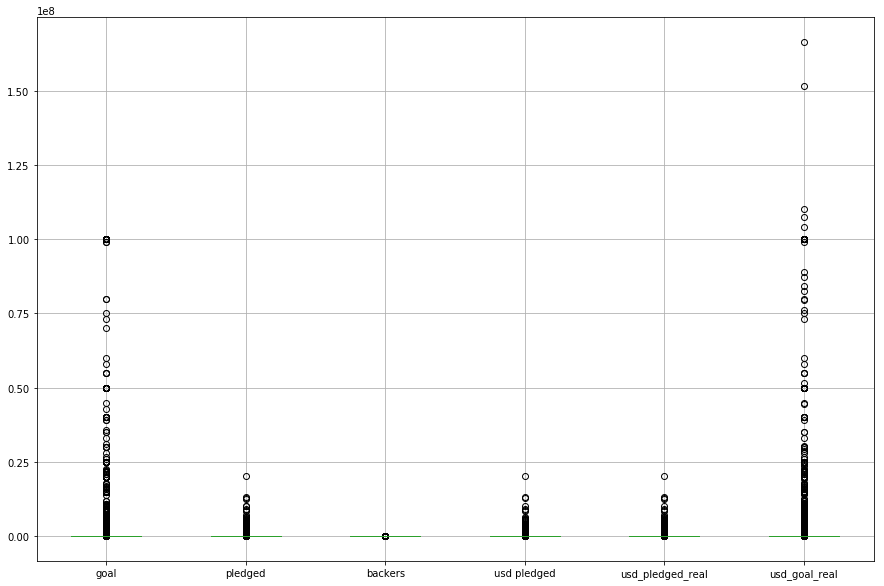

In [9]:
df.boxplot(figsize=(15,10))

On trace un premier box plot pour étudier les grandeurs quantitatives gloabalement. 
On voit qu'il peut y avoir de grands écarts entre les points dans 'goal' et 'usd_goal_real'.
Par conséquence, on va tracer des box plot grandeur par grandeur sur une échelle log. 
On en profite pour étudier le cas de 'backers'. En effet, sur le diagramme ci-dessus, 'backers' n'est représenté que par un seul point.

[]

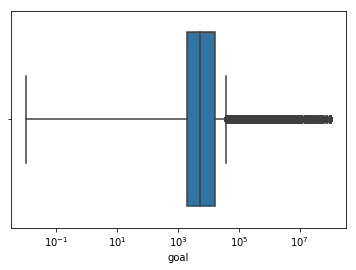

In [10]:
ax = sns.boxplot(df.goal) 
plt.semilogx()

[]

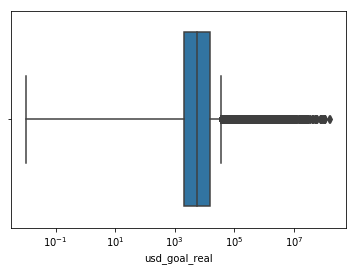

In [11]:
sns.boxplot(df.usd_goal_real)
plt.semilogx()

La grande quantité d'outliers présente dans ces deux derniers boxplot pousse à croire que ces points ne sont pas des abérations et doivent être pris en compte

Text(0.5,1,'Répartition des bakers (log scale)')

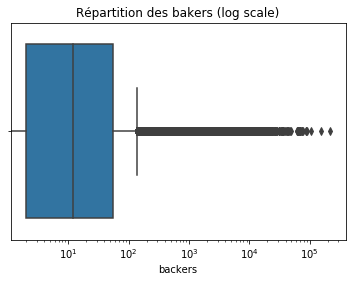

In [12]:
sns.boxplot(df.backers)
plt.semilogx() #En echelle log pour plus de détails
plt.title('Répartition des bakers (log scale)')

On observe ici aussi une très grande quantité de outliers qu'on devra intégrer dans nos analyse comme de la donnée pertinente. La médiane se trouve un peu au dessus de 10^1. Ceci explique pourquoi sur le boxplot global 'backers' n'était représenté que par un seul point. En effet, la grandeur 'backers' contient des valeurs bien plus petites que les autres grandeurs.

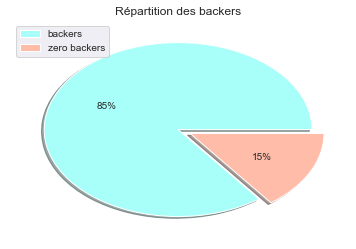

In [66]:
fig, ax = plt.subplots(1, 1)
(df.backers >=1).value_counts().plot.pie(autopct='%0.0f%%', 
                                         explode=[0,.1], 
                                         labels=None, 
                                         shadow=True,
                                         colors=['#a8fffa', '#ffbca8'])

plt.ylabel('')
plt.title('Répartition des backers')
plt.legend(['backers', 'zero backers'], loc=2)

plt.show()

On note que 15% des campagnes n'ont pas de backers

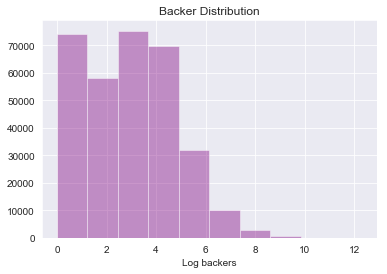

In [14]:
df_backers_more_than_one = df[(df.backers >= 1)]
sns.set_style('darkgrid')
sns.distplot(np.log(df_backers_more_than_one.backers), color='purple', kde=False, bins=10)

plt.title('Répartition backers')
plt.xlabel('Log backers')
plt.show()

En éliminant les campagnes ayant un nb de backers inférieur ou égale à 1, on peut tracer la répartition des backers.
On note le skew vers la gauche qui indique que la majorité des campagnes ont un faible nombre de backers.

## Analyse univariée

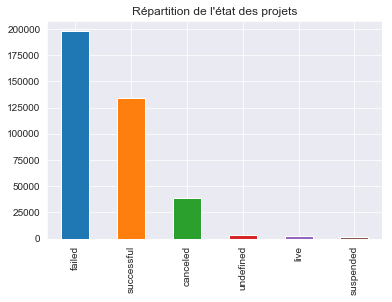

In [15]:
plt.title("Répartition de l'état des projets")
df.state.value_counts().plot.bar()

In [16]:
p_successful = len(df[df['state'] == 'successful']) / len(df) * 100
p_failed = len(df[df['state'] == 'failed']) / len(df) * 100
p_canceled = len(df[df['state'] == 'canceled']) / len(df) * 100
#On crée une categorie 'other' pour regrouper les catégories restante
p_other = 100 - (p_successful + p_failed + p_canceled)

print('{} % des campagnes sont "successful"\n\
{} % des campagnes sont "failed"\n\
{} % des campagnes sont "canceled"\n\
{} % des campagnes sont "other"'.format(round(p_successful, 2), 
                                         round(p_failed, 2), 
                                         round(p_canceled, 2), 
                                         round(p_other, 2)))

35.38 % des campagnes sont "successful"
52.22 % des campagnes sont "failed"
10.24 % des campagnes sont "canceled"
2.17 % des campagnes sont "other"


Un peu plus de la moitié des campagnes échouent sur Kickstarter. Seul un peu plus du tiers des campagne réussissent.

In [67]:
print(len(df.main_category.unique()), "grandes categories de campagnes")
print(len(df.category.unique()), "sous categories")

15 grandes categories de campagnes
159 sous categories


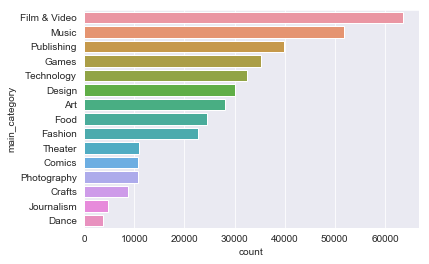

In [18]:
sns.countplot(y='main_category', data=df, order=df['main_category'].value_counts().iloc[:20].index)

On observe que les Film/Vidéo, la musique, et les publications occupent la majeure partie de la plateforme Kickstarter 

Text(0,0.5,'Counts')

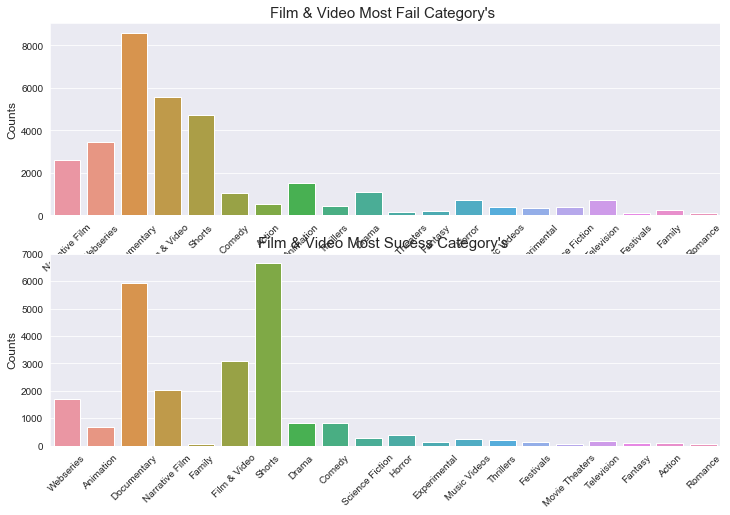

In [19]:
failed_film = df[(df['main_category'] == 'Film & Video') & (df['state'] == 'failed')]
successful_film = df[(df['main_category'] == 'Film & Video') & (df['state'] == 'successful')]

plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
ax0 = sns.countplot(x='category', data=failed_film,)
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_title("Film & Video Most Fail Category's ", fontsize=15)
ax0.set_xlabel("", fontsize=12)
ax0.set_ylabel("Counts", fontsize=12)

plt.subplot(3,1,2)
ax1 = sns.countplot(x='category', data=successful_film)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Film & Video Most Sucess Category's ", fontsize=15)
ax1.set_xlabel("", fontsize=12)
ax1.set_ylabel("Counts", fontsize=12)

On s'intéresse aux sous-catégories de Film/Video. En haut, nous avons la répartition des campagnes qui ont échoué et en bas celles qui ont réussi. Réussite ou pas, les documentaires et les courts-métrages occupent une place importante.

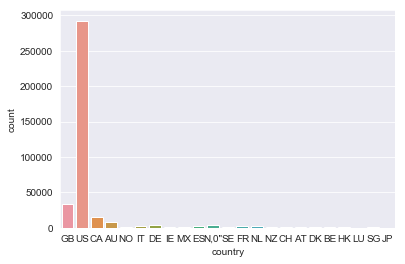

In [20]:
sns.countplot('country', data=df)

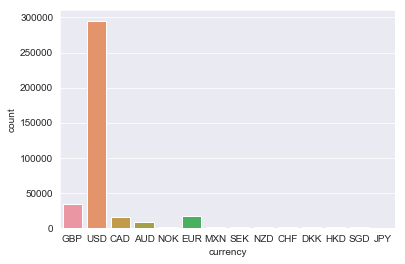

In [21]:
sns.countplot('currency', data=df)

On observe dans les devises et dans la nationalité de la campagne que Kickstarter est dominé par les USA et quelques pays anglo saxon.

## Analyse bivariée

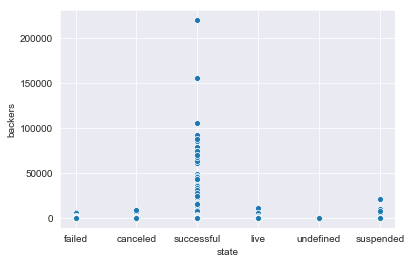

In [22]:
sns.scatterplot(x="state", y="backers", data=df)

On observe que les projets qui réussissent sont les projets ayant beaucoup de backers

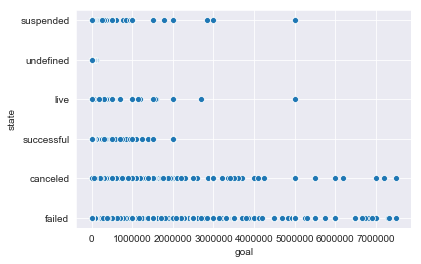

In [23]:
sns.scatterplot(x="goal", y="state", data=df[df['goal'] <= 7500000])

Lorsqu'on compare la ligne 'successful' et 'failed', on observe qu'un objectif trop élevé (goal) réduit les chances de réussir la campagne. Il ne faut pas dépasser les 1 500 000 pour réussir sa campagne.

### Composantes temporelle

In [26]:
# Convert launched, and deadline to datetime objects
for col in ['launched', 'deadline']:
    successful.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

# Convert launched, and deadline to datetime objects
for col in ['launched', 'deadline']:
    failed.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


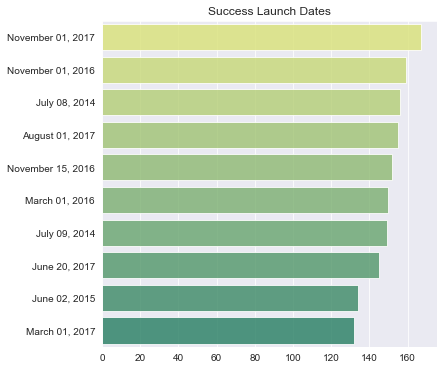

In [68]:
cats = successful.launched.dt.strftime('%B %d, %Y').value_counts().head(10)

x = cats.values
y = cats.index

fig = plt.figure(figsize=(6,6))
sns.barplot(y=y, x=x, orient='h', palette="summer_r", alpha=0.8)

plt.title('Success Launch Dates')
plt.show()

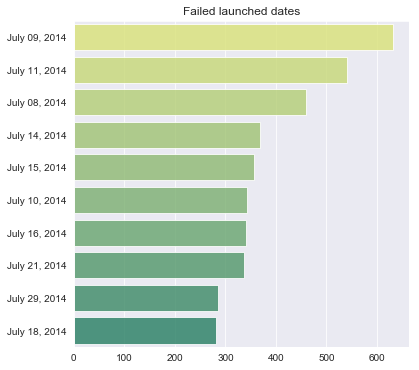

In [70]:
cats = failed.launched.dt.strftime('%B %d, %Y').value_counts().head(10)

x = cats.values
y = cats.index

fig = plt.figure(figsize=(6,6))
sns.barplot(y=y, x=x, orient='h', palette="summer_r", alpha=0.8)

plt.title('Failed launched dates')
plt.show()

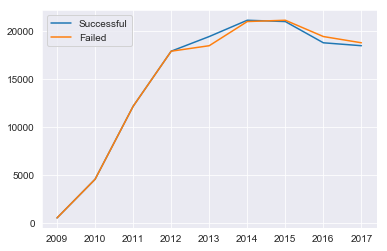

In [29]:
s = successful.launched.dt.year.value_counts()
f = failed.launched.dt.year.value_counts()
ax = sns.lineplot(x=s.index, y=s.values)
ax = sns.lineplot(x=f.index, y=s.values)
plt.legend(['Successful', 'Failed'], loc=2)

In [ ]:
On observe ici l'évolution de nb de campagnes qui ont réussi ou qui ont échoué. A partir de 2015, le nb de campagne 
non réussi est supérieur au nombre de campagne réussi.

## Analyse multivariée

On crée un nouveau dataframe avec les informations ainsi que des transformations de l'information dont on besoin pour l'analyse multivariée

In [57]:
multi = df.copy()
multi['log_goal'] = np.log10(multi.goal)
multi['log_usd_pledged_real'] = np.log10(multi.usd_pledged_real)
multi['success'] = np.where(multi.state == 'successful', 1, 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


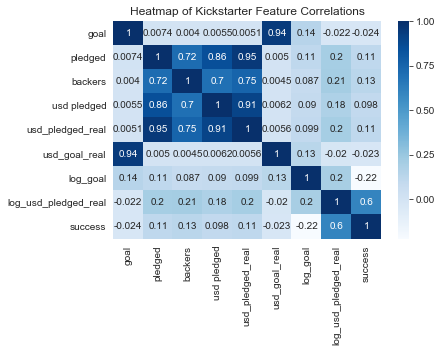

In [59]:
sns.heatmap(multi.corr(), cmap='Blues', annot=True)

plt.title('Heatmap of Kickstarter Feature Correlations')
plt.show()

In [ ]:
On note une forte corrélation entre backers et usd pledged.

## Conclusion

In [ ]:
Pour réussir sa campagne, il est conseillé de viser une audience américaine et plutôt pour financer un film ou une vidéo.